# Data Analysis jobs.ch & itjobs.ch
data from 8.1.2025

In [218]:
import pandas as pd
import json
import os
import seaborn as sns
import re
import matplotlib.pyplot as plt 

In [219]:
parent_dir = os.getcwd()

file_path = os.path.join(parent_dir, '..', 'data', 'jobs_processed.json')

with open(file_path, 'r') as file:
    jobs = json.load(file)

df = pd.DataFrame(jobs)

df.head()

,company,contract_type,descriptions,downloaded,job_title,place_of_work,publication_date,search_query,url,website,...,tools,operating_systems,years,education,language,job_title_cleaned,job_category,rating,reviewed,salary
0,Meanquest,Unlimited employment,"[{'0': ['Concevoir, développer et maintenir de...",True,Développeur Full Stack Java Senior (H/F) à 100%,Genève,10 February 2025,software engineer,https://www.jobs.ch/en/vacancies/detail/170934...,Jobs,...,"[CI/CD, Docker, Git, GitLab, Jenkins, Kubernetes]",[],[],[],NaN,NaN,NaN,NaN,NaN,NaN
1,VAT Vakuumventile AG,NaN,[],True,Project Manager Facility,NaN,NaN,software engineer,https://www.jobs.ch/en/vacancies/detail/16da84...,NaN,...,[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN
2,IWB Industrielle Werke Basel,Unlimited employment,[{'0': ['Datenpipelines implementieren und aut...,True,Data Specialist (w/m),Basel,29 January 2025,data scientist,https://www.jobs.ch/en/vacancies/detail/e453b8...,NaN,...,[],[],[],[],"German (Fluent), English (Fluent)",NaN,NaN,NaN,NaN,NaN
3,NTT DATA Business Solutions AG,NaN,[{'1': []}],True,Berater Analytics 60-100% (w/m/d),Zürich-Flughafen,30 January 2025,all jobs,https://www.itjobs.ch/jobs/berater-analytics-6...,ITJobs,...,[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN
4,Stadler Signalling,Unlimited employment,[{'0': ['System engineering of a hardware & so...,True,System Engineer,"Sulzerallee 11, 8304 Wallisellen",05 February 2025,software engineer,https://www.jobs.ch/en/vacancies/detail/a09ad9...,NaN,...,[],[],[],[],"German (Fluent), English (Fluent)",System Engineer,Cloud/System Engineer,NaN,NaN,NaN


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                3289 non-null   object 
 1   contract_type          1417 non-null   object 
 2   descriptions           4401 non-null   object 
 3   downloaded             4401 non-null   bool   
 4   job_title              4401 non-null   object 
 5   place_of_work          1969 non-null   object 
 6   publication_date       1961 non-null   object 
 7   search_query           4401 non-null   object 
 8   url                    4401 non-null   object 
 9   website                1116 non-null   object 
 10  workload               1452 non-null   object 
 11  career_stage_cleaned   770 non-null    object 
 12  canton                 868 non-null    object 
 13  programming_languages  4401 non-null   object 
 14  frameworks             4401 non-null   object 
 15  tool

In [221]:
# data cleaning
df['publication_date'] = pd.to_datetime(df['publication_date'] , format='mixed')
df["years"] = df["years"].apply(lambda x: [i for i in x if i <20]) # filter experience larger than 20 out
df["max_years"] = df["years"].apply(lambda x: max(x) if x else 0)
df["career_stage_cleaned"] = df["career_stage_cleaned"].apply(lambda x: x if x else "Not Explicit")


In [222]:

for i in df['job_title'][df['job_title_cleaned'].isnull()]:
    print(i)


Développeur Full Stack Java Senior (H/F) à 100%
Project Manager Facility
Data Specialist (w/m)
Berater Analytics 60-100% (w/m/d)
Manager Produktentwicklung & Technologie (m/w/d)
Business Analyst / Requirements-Engineer Front Banking / Kundenschnittstelle (m/w)
Team Leader Supply Chain
Head of Mechanical Development in Heerbrugg, Switzerland
Linux and Openshift Engineer (Ref. 2678)
COLOGNE - Manager Maintenance
Business Data Specialist D/E 80-100% (a)
LWL-Spleisser:in
UI/UX Developer/Engineer
Mechanical Engineer | Delvitech
Security Specialist (alle)
Business Integration Engineer (w/m/d) - Integrierte Planung
Un(e) développeur(euse) en informatique à 70% - 100%
Co-Director, Institute of Human Biology
Assistant-e (A2)
Informatik Ingenieur mit Netzwerk und Linux Kenntnissen (22094 /60% Pensum)
Ausbildung zum Industriemechaniker 2025 (w/m/d)
Selbstständiger Geschäftsführer (m/w/d)
3 Senior Scientists or Postdoctoral Scientists in infectious disease modelling (80-100%) - Swiss TPH
Une/un In

In [223]:
df["workload"].value_counts()

workload
80 – 100%    747
100%         578
60 – 100%     54
40 – 100%     16
50 – 100%     10
80%            8
60%            7
70 – 100%      6
60 – 80%       4
40 – 60%       4
50%            3
40%            2
20 – 40%       2
90 – 100%      2
20 – 100%      1
30%            1
50 – 70%       1
50 – 60%       1
90%            1
60 – 70%       1
40 – 50%       1
5%             1
20%            1
Name: count, dtype: int64

In [224]:
df_small = df[df['job_title_cleaned'].notnull()] # filter only jobs that are CS related (by job title)
df_small = df_small[df_small['publication_date']>='2025-01-01'] # filter only jobs that are published after 2020

In [225]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 4 to 4399
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company                858 non-null    object        
 1   contract_type          682 non-null    object        
 2   descriptions           865 non-null    object        
 3   downloaded             865 non-null    bool          
 4   job_title              865 non-null    object        
 5   place_of_work          865 non-null    object        
 6   publication_date       865 non-null    datetime64[ns]
 7   search_query           865 non-null    object        
 8   url                    865 non-null    object        
 9   website                344 non-null    object        
 10  workload               692 non-null    object        
 11  career_stage_cleaned   865 non-null    object        
 12  canton                 427 non-null    object        
 13  programmi

## Job title

Text(0, 0.5, 'Job Title')

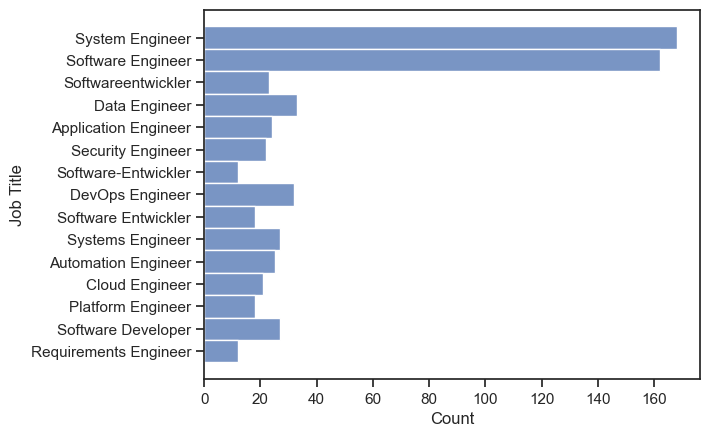

In [226]:
sns.set_theme(style="ticks")
job_counts = df_small['job_title_cleaned'].value_counts()
sns.histplot(data = df_small[df_small['job_title_cleaned'].isin(job_counts.nlargest(15).index)], y = "job_title_cleaned")
plt.xlabel('Count')
plt.ylabel('Job Title')


Text(0, 0.5, '')

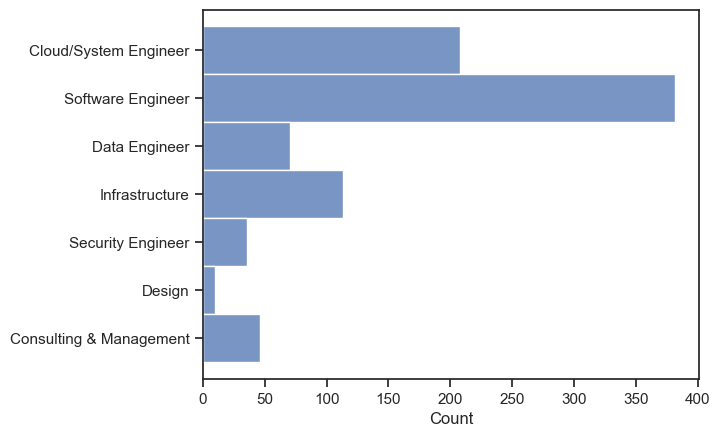

In [227]:

sns.histplot(data = df_small, y = "job_category")
plt.xlabel('Count')
plt.ylabel('')
#plt.savefig("../plots/job_categories.png", bbox_inches='tight')

## Workplace

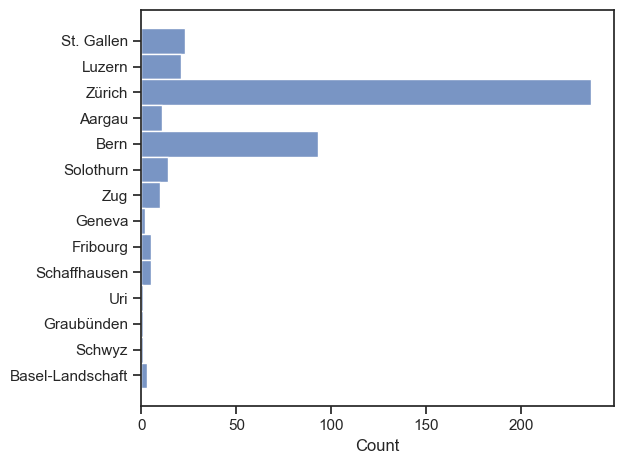

In [228]:
sns.histplot(data = df_small, y = "canton")
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
#plt.savefig("../plots/job_locations.png", bbox_inches='tight')

## Employer

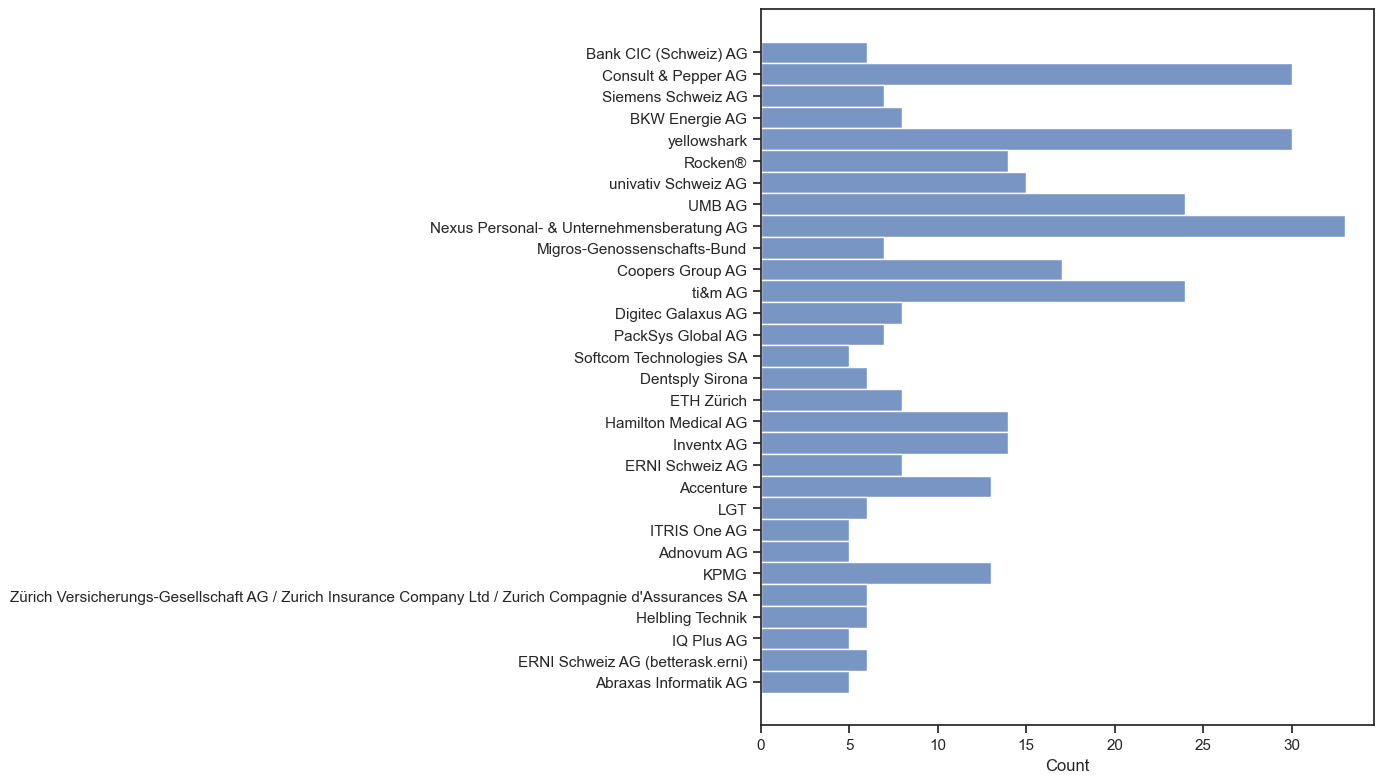

In [229]:
company_counts = df_small['company'].value_counts()
company_hist_df = df_small[df_small['company'].isin(company_counts.nlargest(30).index)]
plt.figure(figsize=(14, 8))
sns.histplot(data =company_hist_df, y = "company")

plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
#plt.savefig("../plots/job_companies.png")

## Job Level

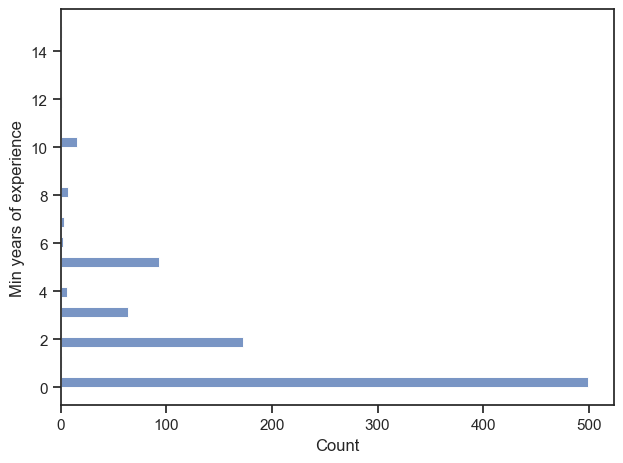

In [230]:
sns.histplot(data =df_small, y = "max_years")
plt.xlabel('Count')
plt.ylabel('Min years of experience')
plt.tight_layout()
#plt.savefig("../plots/histogram_max_years.png")

Text(0, 0.5, '')

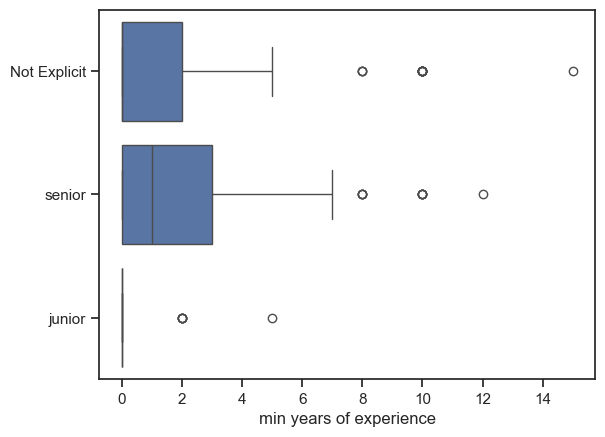

In [231]:
sns.boxplot(data =df_small, x = "max_years", y="career_stage_cleaned")

plt.xlabel('min years of experience')
plt.ylabel('')
#plt.savefig("../plots/seniority.png", bbox_inches='tight')

In [232]:
df_small.groupby(["career_stage_cleaned" ])["max_years"].describe()

,count,mean,std,min,25%,50%,75%,max
career_stage_cleaned,,,,,,,,
Not Explicit,648.0,1.378086,2.091555,0.0,0.0,0.0,2.0,15.0
junior,27.0,0.555556,1.187542,0.0,0.0,0.0,0.0,5.0
senior,190.0,2.031579,2.658530,0.0,0.0,1.0,3.0,12.0


## Time

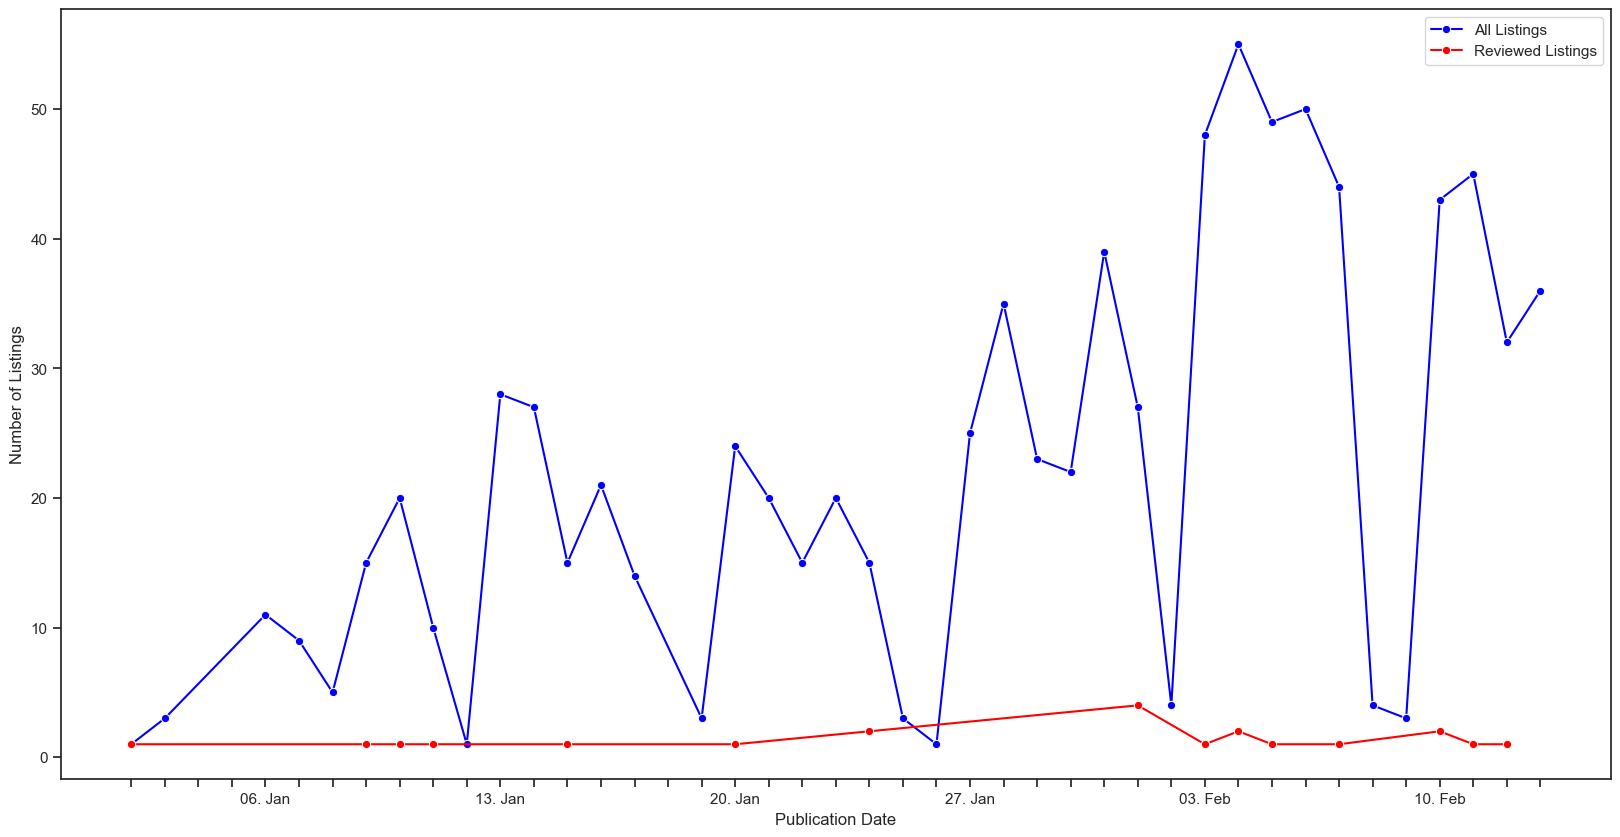

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group all data by date (ignoring reviewed status)
df_total = df_small.groupby(df_small['publication_date'].dt.to_period('D')).size().reset_index(name='count')
df_total['publication_date'] = df_total['publication_date'].dt.start_time  # Convert period back to datetime

# Group reviewed data separately
df_reviewed = df_small[df_small['reviewed'] == True].groupby(df_small['publication_date'].dt.to_period('D')).size().reset_index(name='count')
df_reviewed['publication_date'] = df_reviewed['publication_date'].dt.start_time  # Convert period back to datetime

# Create the plot
plt.figure(figsize=(20, 10))

# Plot all listings (not reviewed) in blue
sns.lineplot(data=df_total, x='publication_date', y='count', label="All Listings", color='blue', marker="o")

# Plot reviewed listings in red (will only show points where reviewed=True)
sns.lineplot(data=df_reviewed, x='publication_date', y='count', label="Reviewed Listings", color='red', marker="o")

# Set x-ticks with only Monday labels
date_range = pd.date_range(df_total['publication_date'].min(), df_total['publication_date'].max(), freq='D')

plt.xticks(
    ticks=date_range,
    labels=['' if d.weekday() != 0 else d.strftime('%d. %b') for d in date_range],
    rotation=0
)

plt.xlabel('Publication Date')
plt.ylabel('Number of Listings')

# Add a legend
plt.legend()

# Save and show the plot
plt.savefig("../plots/time.png", bbox_inches='tight')
plt.show()


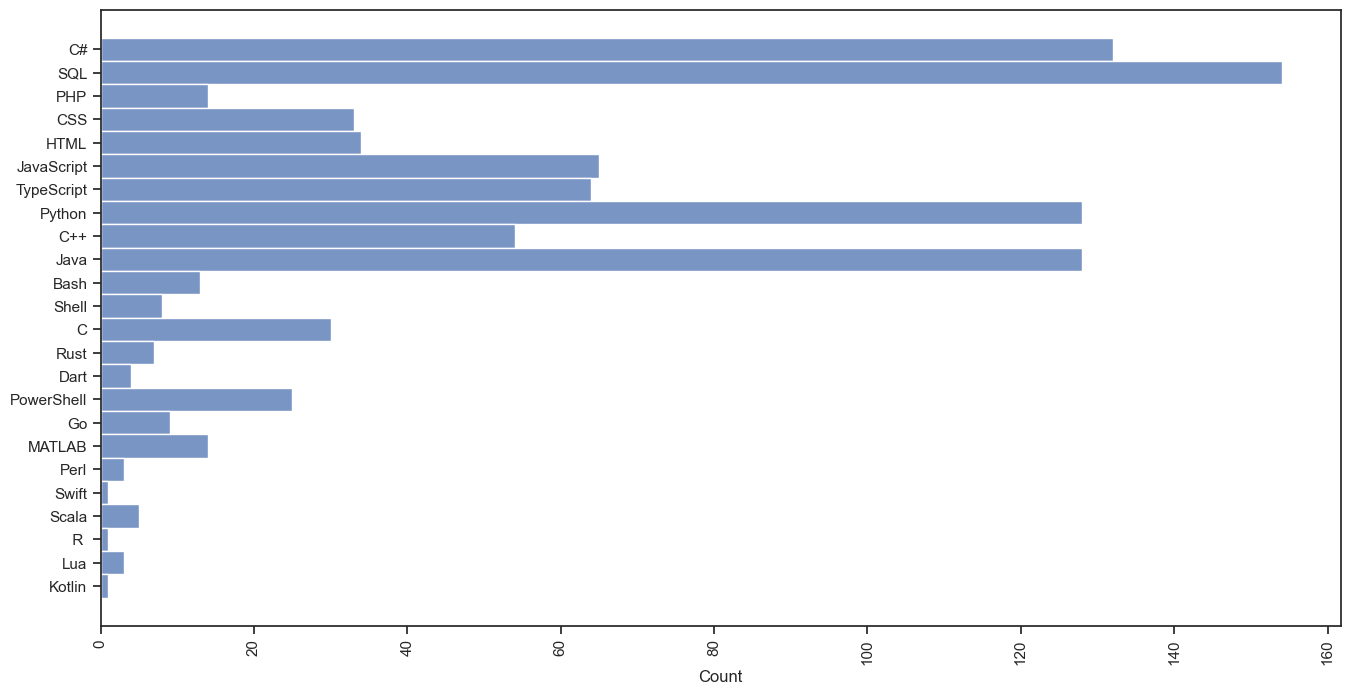

In [234]:
flat_list = [item for sublist in df_small["programming_languages"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, bins=10)
plt.xticks(rotation=90)


#plt.savefig("../plots/languages.png", bbox_inches='tight')

plt.show()


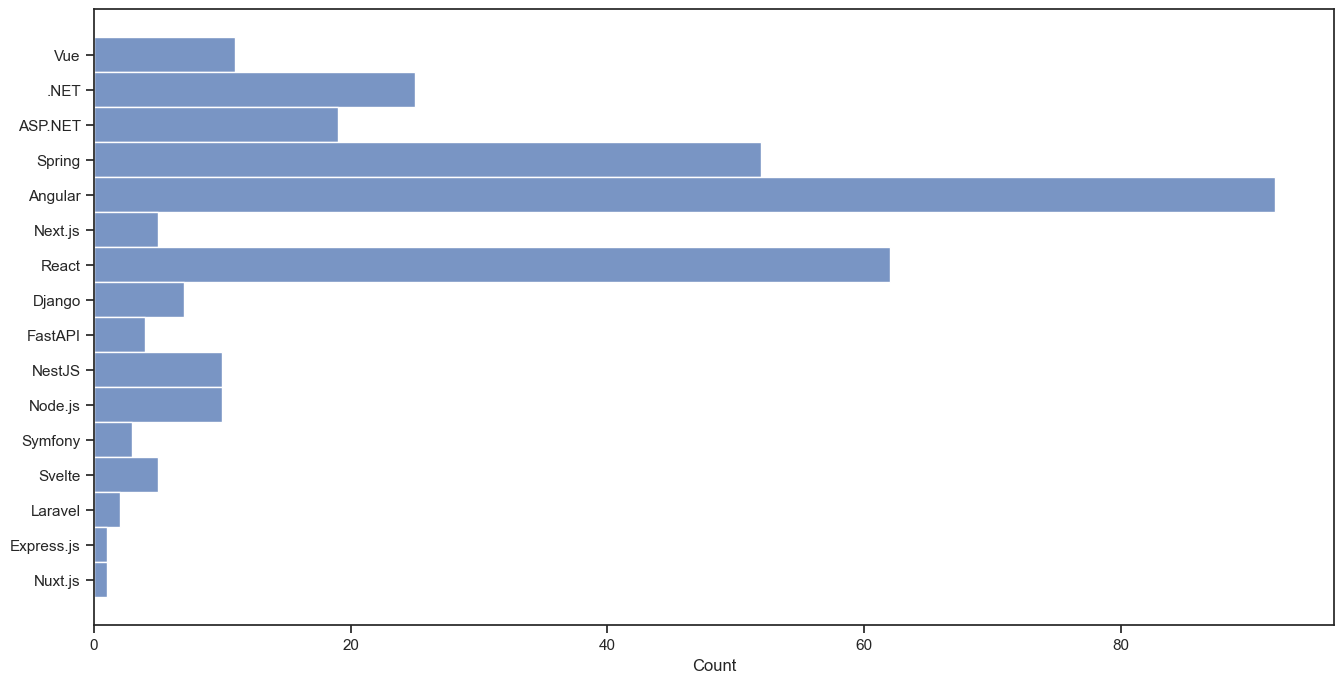

In [235]:
## Frameworks
flat_list = [item for sublist in df_small["frameworks"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, bins=10)


#plt.savefig("../plots/frameworks.png", bbox_inches='tight')
plt.show()


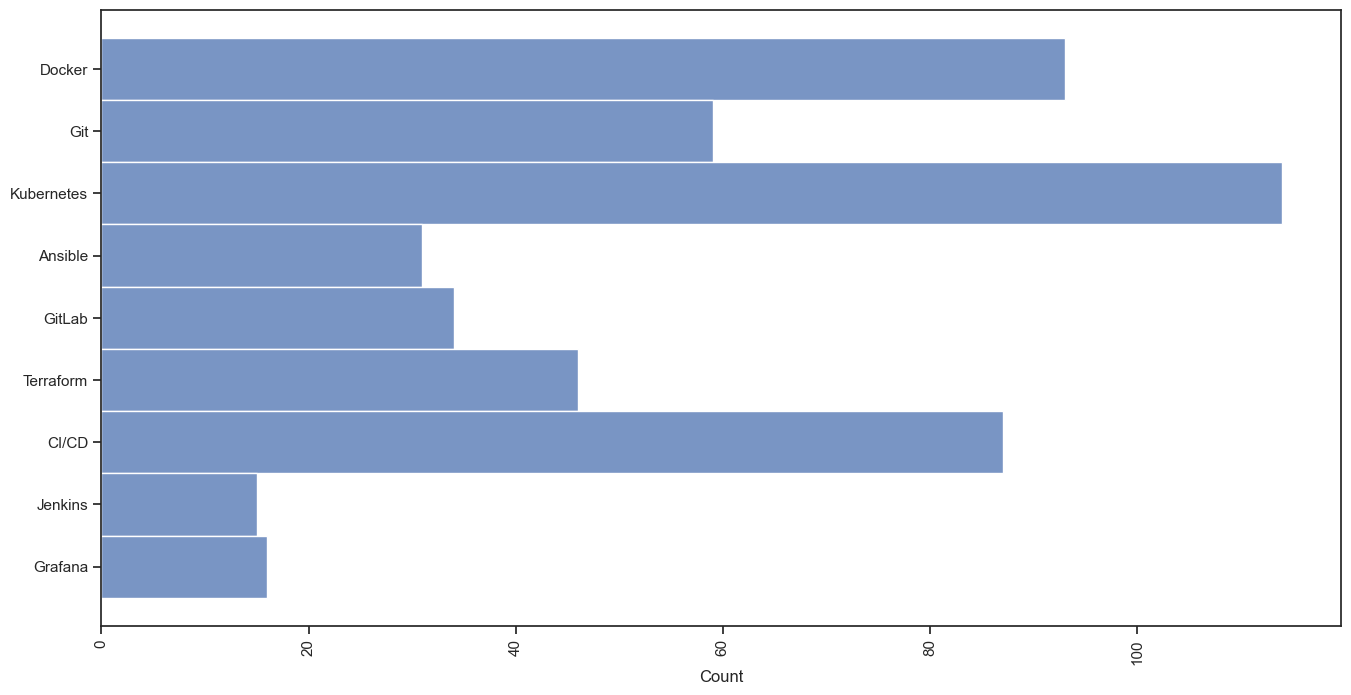

In [236]:
## Tools
flat_list = [item for sublist in df_small["tools"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, kde=False, bins=10)
plt.xticks(rotation=90)
#plt.savefig("../plots/tools.png", bbox_inches='tight')
plt.show()


In [237]:

flat_list = [item for sublist in df_small["operating_systems"] for item in sublist]
plt.figure(figsize=(16, 8))
#sns.histplot(y = flat_list, bins=10)

plt.show()

<Figure size 1600x800 with 0 Axes>

## My Interests

In [238]:
df_good = df_small[df_small['job_category'].isin(['Software Engineer', 'Data Engineer', 'Design'])]
df_good = df_good[
    (df_good['max_years'] <= 2) | 
    (df_good['programming_languages'].apply(lambda x: "Python" in x)) | 
    (df_good['job_category'] == 'Data Engineer')
]
df_good = df_good[df_good['canton'].isin(["Zürich"])]
df_good = df_good[df_good['career_stage_cleaned']!= "senior"]
df_good = df_good[df_good['publication_date']>='2025-02-01']
df_good.sort_values('publication_date')

,company,contract_type,descriptions,downloaded,job_title,place_of_work,publication_date,search_query,url,website,...,operating_systems,years,education,language,job_title_cleaned,job_category,rating,reviewed,salary,max_years
230,Nexus Personal- & Unternehmensberatung AG,NaN,[{'1': []}],True,Junior Webapplikationsentwickler (a) für abwec...,Stadt Zürich,2025-02-01,all jobs,https://www.itjobs.ch/jobs/junior-webapplikati...,ITJobs,...,[],[],[],NaN,Applikationsentwickler,Software Engineer,NaN,NaN,NaN,0
3481,Adnovum AG,NaN,[{'1': []}],True,Android Software Engineer,Zürich,2025-02-01,all jobs,https://www.itjobs.ch/jobs/android-software-en...,ITJobs,...,[],[],[],NaN,Software Engineer,Software Engineer,NaN,NaN,NaN,0
4246,Supercomputing Systems AG,Unlimited employment,"[{'0': ['Softwareentwicklung', 'Softwaredesign...",True,Software Developer für ein dynamisches Scrum-T...,"Technoparkstrasse 1, 8005 Zürich",2025-02-03,software engineer,https://www.jobs.ch/en/vacancies/detail/c3ef0a...,NaN,...,[Linux],[],[],German (Fluent),Software Developer,Software Engineer,NaN,NaN,NaN,0
4218,yellowshark,Unlimited employment,[],True,Software Entwickler Java (w/m) 80-100%,Zürich,2025-02-03,software engineer,https://www.jobs.ch/en/vacancies/detail/f32dcb...,Jobs,...,[],[],[],"German (Fluent), English (Fluent)",Software Entwickler,Software Engineer,NaN,NaN,CHF 85 000 - 100 000 /year,0
1844,PackSys Global AG,Unlimited employment,"[{'0': ['Du entwickelst, simulierst und testes...",True,Automation Software Engineer,"Spitalstrasse 38, 8630 Rüti ZH",2025-02-03,software engineer,https://www.jobs.ch/en/vacancies/detail/1277f0...,NaN,...,[],[],[],"German (Fluent), English (Fluent)",Software Engineer,Software Engineer,1.0,True,NaN,0
1656,Consult & Pepper AG,Unlimited employment,[{'0': ['Du bist für die Neu- und Weiterentwic...,True,(Junior) Software Engineer C#/.NET (80 – 100%)...,Zürich,2025-02-03,software engineer,https://www.jobs.ch/en/vacancies/detail/93a0c1...,NaN,...,[],[2],[],"German (Fluent), English (Intermediate)",Software Engineer,Software Engineer,NaN,NaN,NaN,2
3530,exedra ag Zürich,Unlimited employment,[{'0': ['Durchführung detaillierter Analysen u...,True,Performance Data Analyst,8001 Zürich,2025-02-04,data scientist,https://www.jobs.ch/en/vacancies/detail/ef6284...,NaN,...,[],[2],[Vocational],German (Intermediate),Data Analyst,Data Engineer,NaN,NaN,NaN,2
3209,ti&m AG,Unlimited employment,[{'0': ['Spannende und innovative Datenprojekt...,True,Data Architect,"Buckhauserstrasse 24, 8048 Zürich",2025-02-04,data engineer,https://www.jobs.ch/en/vacancies/detail/831a20...,NaN,...,[],[8],[],"German (Fluent), English (Fluent)",Data Architect,Data Engineer,NaN,NaN,NaN,8
918,ti&m AG,Unlimited employment,[{'0': ['Spannende und innovative Datenprojekt...,True,Data Architect,"Buckhauserstrasse 24, 8048 Zürich",2025-02-04,software engineer,https://www.jobs.ch/en/vacancies/detail/831a20...,NaN,...,[],[8],[],"German (Fluent), English (Fluent)",Data Architect,Data Engineer,NaN,NaN,NaN,8
951,PRODYNA (Schweiz) AG,Unlimited employment,[{'0': ['Du entwickelst cloudfähige Softwarelö...,True,Full Stack Software Engineer (m/w/d),"Basel, Zürich oder Bern",2025-02-05,software engineer,https://www.jobs.ch/en/vacancies/detail/24cdbe...,NaN,...,[],[],[],"German (Fluent), English (Intermediate)",Software Engineer,Software Engineer,NaN,NaN,NaN,0


In [239]:
for _, row in df_good.sort_values('publication_date').iterrows():

    print(f'{row.job_title}: {row.url} , {row.company}' )

Junior Webapplikationsentwickler (a) für abwechslungreiche Kundenprojekte: https://www.itjobs.ch/jobs/junior-webapplikationsentwickler-a-fur-abwechslungreiche-kundenprojekte/111820/ , Nexus Personal- & Unternehmensberatung AG
Android Software Engineer: https://www.itjobs.ch/jobs/android-software-engineer/116805/ , Adnovum AG
Software Developer für ein dynamisches Scrum-Team (m/w/d): https://www.jobs.ch/en/vacancies/detail/c3ef0a23-8922-477d-9443-54b74c04e7ec/ , Supercomputing Systems AG
Software Entwickler Java (w/m) 80-100%: https://www.jobs.ch/en/vacancies/detail/f32dcbca-7eda-4e5b-a322-48cf6725bf2e/ , yellowshark
Automation Software Engineer: https://www.jobs.ch/en/vacancies/detail/1277f0a7-f931-4594-a7de-2cd2e36cade2/ , PackSys Global AG
(Junior) Software Engineer C#/.NET (80 – 100%) (a): https://www.jobs.ch/en/vacancies/detail/93a0c1af-55be-4e21-80e4-cf504a4d67d1/ , Consult & Pepper AG
Performance Data Analyst: https://www.jobs.ch/en/vacancies/detail/ef6284e8-e5d0-4653-954d-cc8a93

<Axes: xlabel='Count', ylabel='company'>

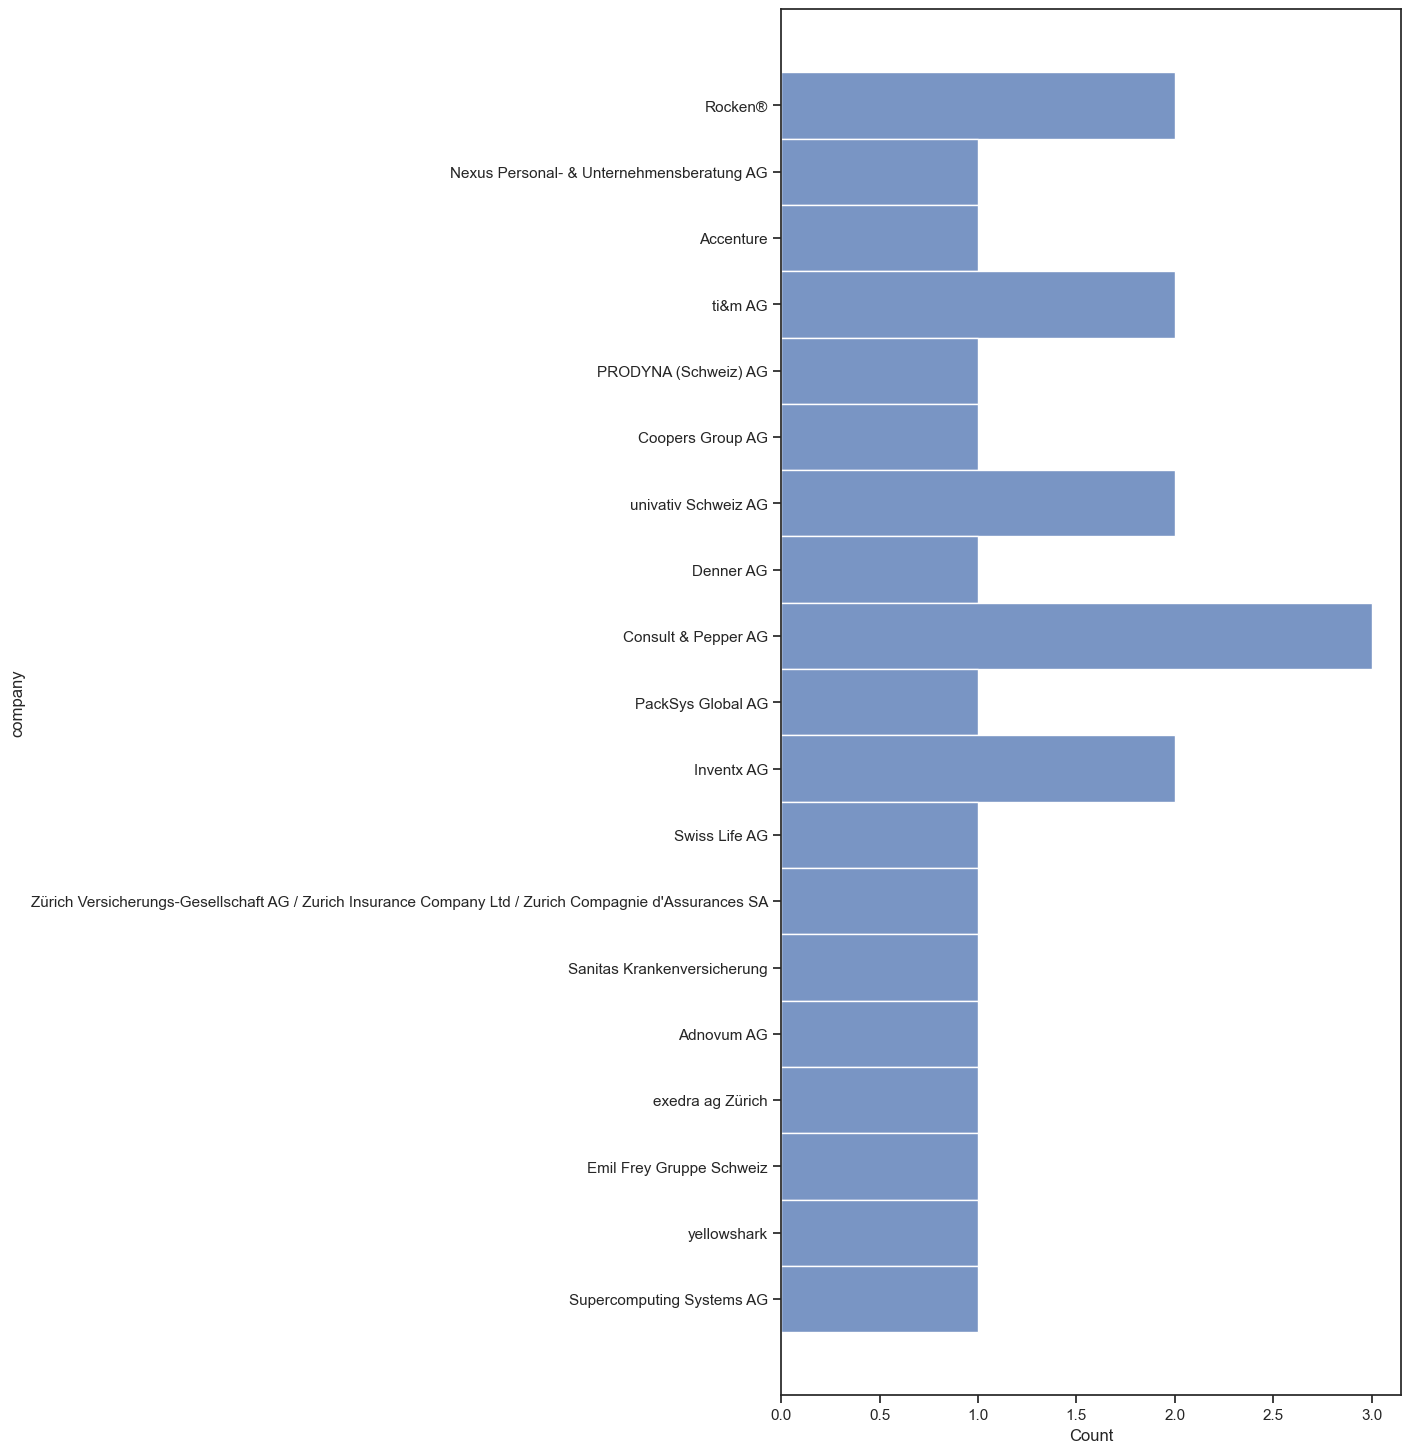

In [240]:

plt.figure(figsize=(8, 18))
sns.histplot(data =df_good, y = "company")